# Principal Component Analysis

- Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning
- It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. 
- These new transformed features are called the Principal Components. 
- It is one of the popular tools that is used for exploratory data analysis and predictive modeling. 
- It is a technique to draw strong patterns from the given dataset by reducing the variances.

- PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.
- PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. 
- Some real-world applications of PCA are image processing, movie recommendation system, optimizing the power allocation in various communication channels. 
- It is a feature extraction technique, so it contains the important variables and drops the least important variable.

#### The PCA algorithm is based on some mathematical concepts such as:

- Variance and Covariance
- Eigenvalues and Eigen factors


### Some common terms used in PCA algorithm:

#### Dimensionality: 
- It is the number of features or variables present in the given dataset. More easily, it is the number of columns present in the dataset.


#### Correlation: 
- It signifies that how strongly two variables are related to each other. Such as if one changes, the other variable also gets changed. The correlation value ranges from -1 to +1. Here, -1 occurs if variables are inversely proportional to each other, and +1 indicates that variables are directly proportional to each other.


#### Orthogonal: 
- It defines that variables are not correlated to each other, and hence the correlation between the pair of variables is zero.



#### Eigenvectors:
- If there is a square matrix M, and a non-zero vector v is given. Then v will be eigenvector if Av is the scalar multiple of v.


#### Covariance Matrix: 
- A matrix containing the covariance between the pair of variables is called the Covariance Matrix.

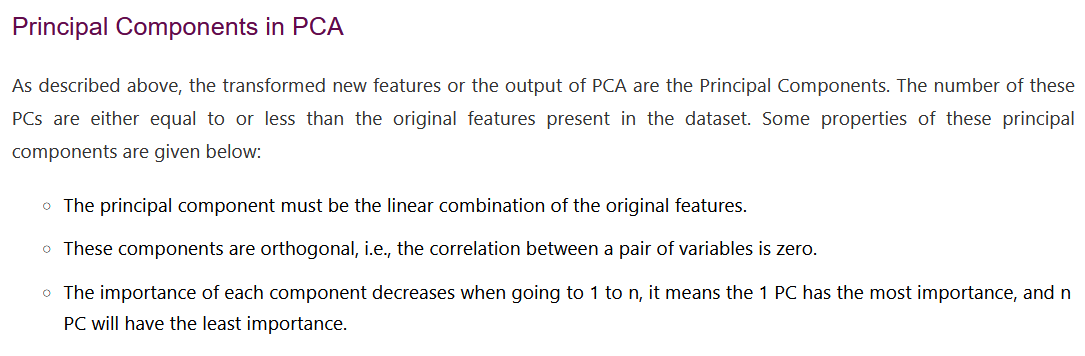

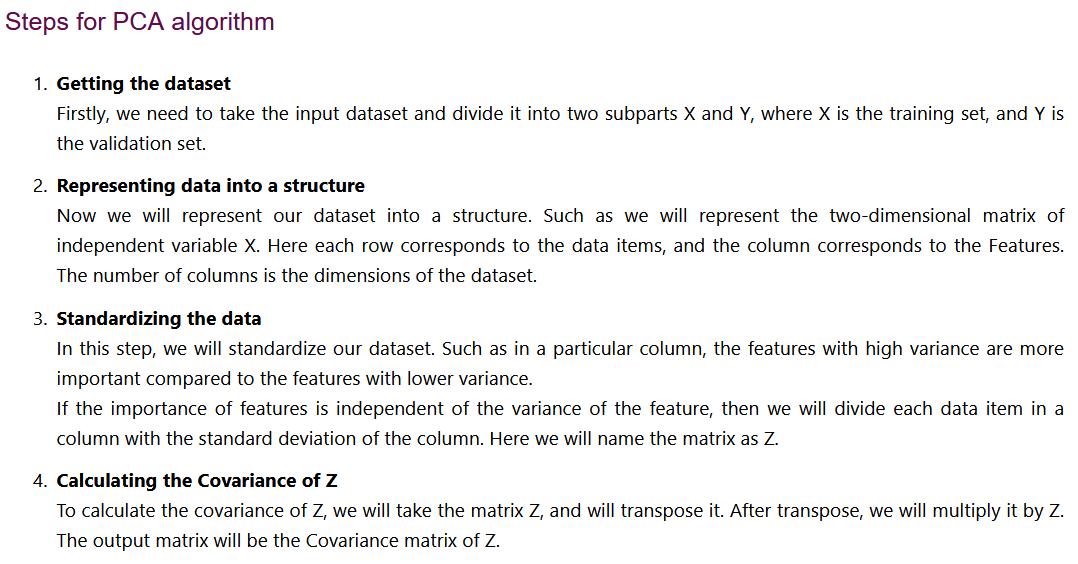

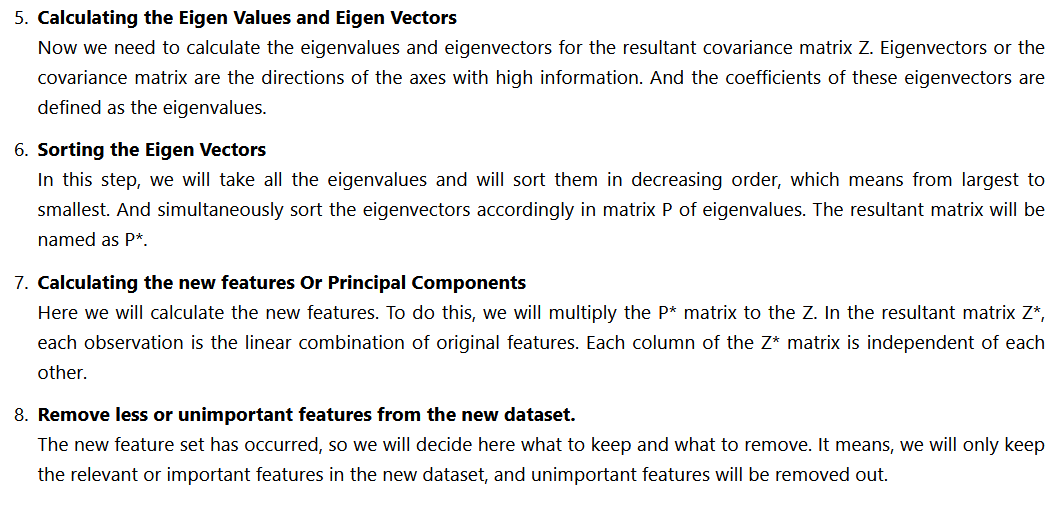

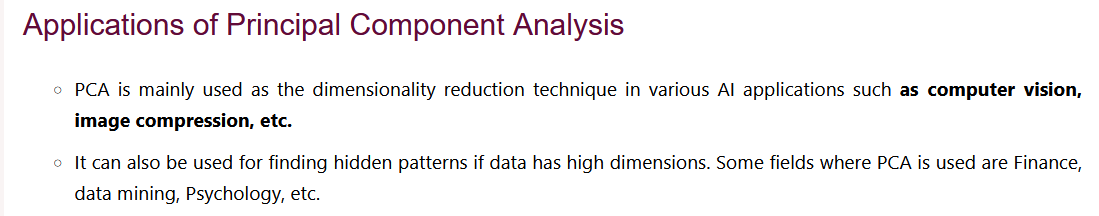

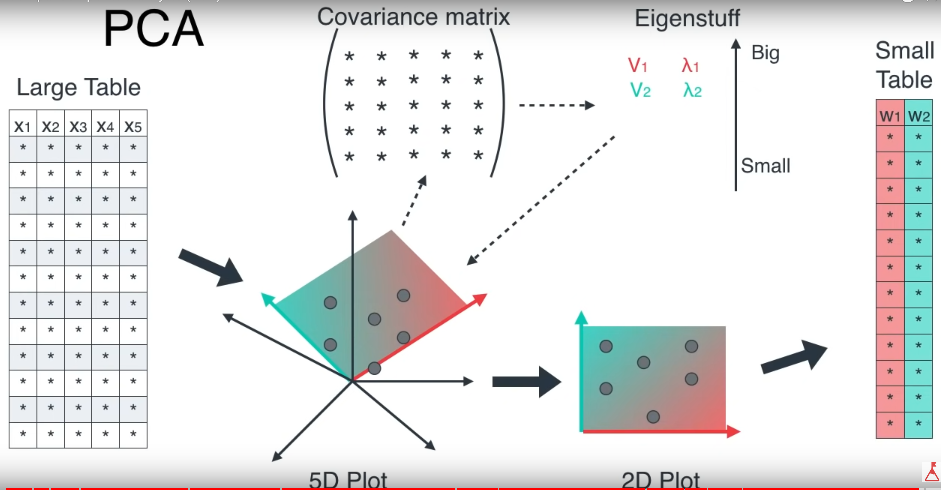

In [ ]:
PCA

Are all the features in your dataset needed? Say a you have some flowers and you measured their petal length. If you have a column of that measurement in centimeters and another column with the measurement in inches, do you need both columns? In that circumstance, you can probably drop either column without losing information. In other cases, dropping a column could lead to issues. Principal component analysis, better known as PCA, is a technique that you can use to smartly reduce the dimensionality of your dataset while losing the least amount of information possible. One use of PCA is for data visualization. In this video, I'll share with you how you can use PCA to help visualize your data. 

## Import Libraries

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [14]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [15]:
speciesDict = {0: 'setosa', 1:'versicolor', 2:'virginica'}

df.loc[:,'target'] = df.loc[:, 'target'].apply(lambda x: speciesDict[x])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Standardize the Data
PCA is effected by scale so you need to scale the features in the data before using PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. 

In [16]:
# Apply Standardization to features matrix X
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [17]:
x = StandardScaler().fit_transform(x)

In [18]:
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## PCA Projection to 2D
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). The code below projects the original data which is 4 dimensional into 2 dimensions. Note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [21]:
# Make an instance of PCA
pca = PCA(n_components=2)

# Fit and transform the data
principalComponents = pca.fit_transform(x) # 

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [22]:
principalDf

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


## Visualize 2D Projection
PCA projection to 2D to visualize the entire data set. 

In [23]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [24]:
finalDf

,principal component 1,principal component 2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


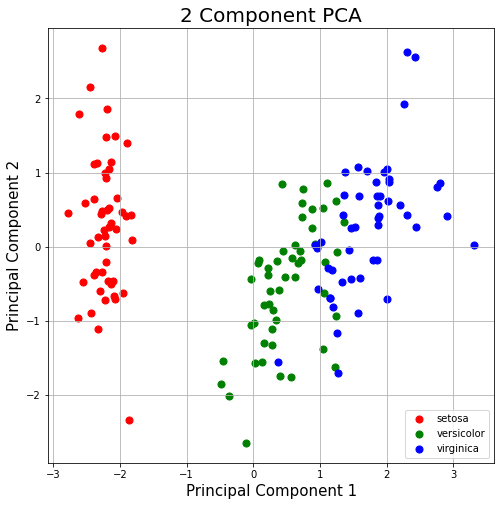

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));
targets = df.loc[:, 'target'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)    
ax.legend(targets)
ax.grid()

From the graph, it looks like the setosa class is well separated from the versicolor and virginica classes.

## Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this.

In [26]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [27]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

Together, the two principal components contain about 96% of the information. The first principal component contains about 73% of the variance. The second principal component contains about 23% of the variance. 

So that's it, PCA can be used to help visualize your data.